In [9]:
from scripts.utils import get_device
from scripts.train_model import train_model
from scripts.test_model import test_model
from scripts.utils import convert_to_color_

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report as score
from scipy.io import loadmat

import torch

## Проверяем доступность GPU для вычислений

In [2]:
torch.cuda.is_available()

True

## Задаем параметры запуска


In [18]:
DATASET_PATH: str = 'data/med/' # путь до папки с данными
IMG_NAME: str = 'iz3kubov.mat' # название .mat файла с гиперспектральным изображением (ключ по умолчанию 'image')
GT_NAME: str = 'iz3kubov_gt.mat' # название .mat файла с маской (ключ по умолчанию 'img')
WEIGHTS_PATH: str = 'checkpoints/short_he/he/2022_05_05_14_04_27_epoch15_0.96.pth' # путь до файла с весами (опционально)
SAMPLE_PERCENTAGE: float = 0.1 # размер тренировочной выборки из куба
CUDA_DEVICE = get_device(0) # подключение к доступному GPU, иначе подключается CPU

Computation on CUDA GPU device 0


## Задаем гиперпараметры для сети

In [16]:
# Список классов в .mat файле (TODO надо бы вынести в mat файл)
LABEL_VALUES = [
        "Undefined",
        "background",
        "c1",
        "c2",
        "c3",
        #"c4",
    ]
# Указываем количество эпох, классов и устройство для вычисления
hyperparams = {
        'epoch': 15,
        'n_classes': len(LABEL_VALUES),
        'device': CUDA_DEVICE
    }

## Вызов обучения сети

In [17]:
train_model(dataset_path=DATASET_PATH,
                img_name=IMG_NAME,
                gt_name=GT_NAME,
                sample_percentage=SAMPLE_PERCENTAGE,
                LABEL_VALUES=LABEL_VALUES,
                hyperparams=hyperparams)

C:\Users\Firsov\PycharmProjects\hyperspectral-analysis\scripts\newModel.py:77: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight)
C:\Users\Firsov\PycharmProjects\hyperspectral-analysis\scripts\utils.py:123: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_gt[train_indices] = gt[train_indices]
C:\Users\Firsov\PycharmProjects\hyperspectral-analysis\scripts\utils.py:124: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  test_gt[test_indices] = gt[test_indices]


(60000,)
(40200,)


  0%|                                                                                           | 0/15 [00:06<?, ?it/s]

Train (epoch 1/15) [3960/25400 (16%)]	Loss: 2.354886


  0%|                                                                                           | 0/15 [00:12<?, ?it/s]

Train (epoch 1/15) [7960/25400 (31%)]	Loss: 0.316681


  0%|                                                                                           | 0/15 [00:18<?, ?it/s]

Train (epoch 1/15) [11960/25400 (47%)]	Loss: 0.220365


  0%|                                                                                           | 0/15 [00:25<?, ?it/s]

Train (epoch 1/15) [15960/25400 (63%)]	Loss: 0.155366


  0%|                                                                                           | 0/15 [00:31<?, ?it/s]

Train (epoch 1/15) [19960/25400 (79%)]	Loss: 0.213506


  0%|                                                                                           | 0/15 [00:37<?, ?it/s]

Train (epoch 1/15) [23960/25400 (94%)]	Loss: 0.134811


  7%|█████▌                                                                             | 1/15 [00:45<10:34, 45.30s/it]

Saving neural network weights in 2022_05_05_13_53_52_epoch1_0.94


  7%|█████▌                                                                             | 1/15 [00:49<10:34, 45.30s/it]

Train (epoch 2/15) [2560/25400 (10%)]	Loss: 0.145149


  7%|█████▌                                                                             | 1/15 [00:55<10:34, 45.30s/it]

Train (epoch 2/15) [6560/25400 (26%)]	Loss: 0.144610


  7%|█████▌                                                                             | 1/15 [01:01<10:34, 45.30s/it]

Train (epoch 2/15) [10560/25400 (42%)]	Loss: 0.110439


  7%|█████▌                                                                             | 1/15 [01:07<10:34, 45.30s/it]

Train (epoch 2/15) [14560/25400 (57%)]	Loss: 0.113211


  7%|█████▌                                                                             | 1/15 [01:13<10:34, 45.30s/it]

Train (epoch 2/15) [18560/25400 (73%)]	Loss: 0.112615


  7%|█████▌                                                                             | 1/15 [01:20<10:34, 45.30s/it]

Train (epoch 2/15) [22560/25400 (89%)]	Loss: 0.115370


 13%|███████████                                                                        | 2/15 [01:30<09:45, 45.08s/it]

Saving neural network weights in 2022_05_05_13_54_37_epoch2_0.96


 13%|███████████                                                                        | 2/15 [01:32<09:45, 45.08s/it]

Train (epoch 3/15) [1160/25400 (5%)]	Loss: 0.095243


 13%|███████████                                                                        | 2/15 [01:38<09:45, 45.08s/it]

Train (epoch 3/15) [5160/25400 (20%)]	Loss: 0.093709


 13%|███████████                                                                        | 2/15 [01:44<09:45, 45.08s/it]

Train (epoch 3/15) [9160/25400 (36%)]	Loss: 0.093456


 13%|███████████                                                                        | 2/15 [01:50<09:45, 45.08s/it]

Train (epoch 3/15) [13160/25400 (52%)]	Loss: 0.089760


 13%|███████████                                                                        | 2/15 [01:56<09:45, 45.08s/it]

Train (epoch 3/15) [17160/25400 (68%)]	Loss: 0.108352


 13%|███████████                                                                        | 2/15 [02:02<09:45, 45.08s/it]

Train (epoch 3/15) [21160/25400 (83%)]	Loss: 0.088841


 13%|███████████                                                                        | 2/15 [02:09<09:45, 45.08s/it]

Train (epoch 3/15) [25160/25400 (99%)]	Loss: 0.092365


 20%|████████████████▌                                                                  | 3/15 [02:15<08:59, 44.98s/it]

Saving neural network weights in 2022_05_05_13_55_22_epoch3_0.96


 20%|████████████████▌                                                                  | 3/15 [02:20<08:59, 44.98s/it]

Train (epoch 4/15) [3760/25400 (15%)]	Loss: 0.086801


 20%|████████████████▌                                                                  | 3/15 [02:27<08:59, 44.98s/it]

Train (epoch 4/15) [7760/25400 (31%)]	Loss: 0.081016


 20%|████████████████▌                                                                  | 3/15 [02:33<08:59, 44.98s/it]

Train (epoch 4/15) [11760/25400 (46%)]	Loss: 0.089599


 20%|████████████████▌                                                                  | 3/15 [02:39<08:59, 44.98s/it]

Train (epoch 4/15) [15760/25400 (62%)]	Loss: 0.089503


 20%|████████████████▌                                                                  | 3/15 [02:45<08:59, 44.98s/it]

Train (epoch 4/15) [19760/25400 (78%)]	Loss: 0.080265


 20%|████████████████▌                                                                  | 3/15 [02:51<08:59, 44.98s/it]

Train (epoch 4/15) [23760/25400 (94%)]	Loss: 0.072705


 27%|██████████████████████▏                                                            | 4/15 [03:00<08:14, 44.96s/it]

Saving neural network weights in 2022_05_05_13_56_07_epoch4_0.96


 27%|██████████████████████▏                                                            | 4/15 [03:03<08:14, 44.96s/it]

Train (epoch 5/15) [2360/25400 (9%)]	Loss: 0.070914


 27%|██████████████████████▏                                                            | 4/15 [03:09<08:14, 44.96s/it]

Train (epoch 5/15) [6360/25400 (25%)]	Loss: 0.071276


 27%|██████████████████████▏                                                            | 4/15 [03:16<08:14, 44.96s/it]

Train (epoch 5/15) [10360/25400 (41%)]	Loss: 0.074612


 27%|██████████████████████▏                                                            | 4/15 [03:22<08:14, 44.96s/it]

Train (epoch 5/15) [14360/25400 (57%)]	Loss: 0.058438


 27%|██████████████████████▏                                                            | 4/15 [03:28<08:14, 44.96s/it]

Train (epoch 5/15) [18360/25400 (72%)]	Loss: 0.071177


 27%|██████████████████████▏                                                            | 4/15 [03:34<08:14, 44.96s/it]

Train (epoch 5/15) [22360/25400 (88%)]	Loss: 0.068216


 33%|███████████████████████████▋                                                       | 5/15 [03:44<07:29, 44.92s/it]

Saving neural network weights in 2022_05_05_13_56_52_epoch5_0.96


 33%|███████████████████████████▋                                                       | 5/15 [03:46<07:29, 44.92s/it]

Train (epoch 6/15) [960/25400 (4%)]	Loss: 0.074747


 33%|███████████████████████████▋                                                       | 5/15 [03:52<07:29, 44.92s/it]

Train (epoch 6/15) [4960/25400 (20%)]	Loss: 0.060837


 33%|███████████████████████████▋                                                       | 5/15 [03:58<07:29, 44.92s/it]

Train (epoch 6/15) [8960/25400 (35%)]	Loss: 0.061087


 33%|███████████████████████████▋                                                       | 5/15 [04:04<07:29, 44.92s/it]

Train (epoch 6/15) [12960/25400 (51%)]	Loss: 0.058177


 33%|███████████████████████████▋                                                       | 5/15 [04:11<07:29, 44.92s/it]

Train (epoch 6/15) [16960/25400 (67%)]	Loss: 0.058770


 33%|███████████████████████████▋                                                       | 5/15 [04:17<07:29, 44.92s/it]

Train (epoch 6/15) [20960/25400 (83%)]	Loss: 0.053230


 33%|███████████████████████████▋                                                       | 5/15 [04:23<07:29, 44.92s/it]

Train (epoch 6/15) [24960/25400 (98%)]	Loss: 0.056445


 40%|█████████████████████████████████▏                                                 | 6/15 [04:29<06:44, 44.96s/it]

Saving neural network weights in 2022_05_05_13_57_37_epoch6_0.96


 40%|█████████████████████████████████▏                                                 | 6/15 [04:35<06:44, 44.96s/it]

Train (epoch 7/15) [3560/25400 (14%)]	Loss: 0.045359


 40%|█████████████████████████████████▏                                                 | 6/15 [04:42<06:44, 44.96s/it]

Train (epoch 7/15) [7560/25400 (30%)]	Loss: 0.056412


 40%|█████████████████████████████████▏                                                 | 6/15 [04:48<06:44, 44.96s/it]

Train (epoch 7/15) [11560/25400 (46%)]	Loss: 0.072948


 40%|█████████████████████████████████▏                                                 | 6/15 [04:54<06:44, 44.96s/it]

Train (epoch 7/15) [15560/25400 (61%)]	Loss: 0.074181


 40%|█████████████████████████████████▏                                                 | 6/15 [05:01<06:44, 44.96s/it]

Train (epoch 7/15) [19560/25400 (77%)]	Loss: 0.062945


 40%|█████████████████████████████████▏                                                 | 6/15 [05:07<06:44, 44.96s/it]

Train (epoch 7/15) [23560/25400 (93%)]	Loss: 0.066668


 47%|██████████████████████████████████████▋                                            | 7/15 [05:16<06:02, 45.37s/it]

Saving neural network weights in 2022_05_05_13_58_23_epoch7_0.96


 47%|██████████████████████████████████████▋                                            | 7/15 [05:19<06:02, 45.37s/it]

Train (epoch 8/15) [2160/25400 (9%)]	Loss: 0.060332


 47%|██████████████████████████████████████▋                                            | 7/15 [05:25<06:02, 45.37s/it]

Train (epoch 8/15) [6160/25400 (24%)]	Loss: 0.055901


 47%|██████████████████████████████████████▋                                            | 7/15 [05:32<06:02, 45.37s/it]

Train (epoch 8/15) [10160/25400 (40%)]	Loss: 0.057139


 47%|██████████████████████████████████████▋                                            | 7/15 [05:38<06:02, 45.37s/it]

Train (epoch 8/15) [14160/25400 (56%)]	Loss: 0.050088


 47%|██████████████████████████████████████▋                                            | 7/15 [05:44<06:02, 45.37s/it]

Train (epoch 8/15) [18160/25400 (71%)]	Loss: 0.058715


 47%|██████████████████████████████████████▋                                            | 7/15 [05:51<06:02, 45.37s/it]

Train (epoch 8/15) [22160/25400 (87%)]	Loss: 0.055039


 53%|████████████████████████████████████████████▎                                      | 8/15 [06:02<05:18, 45.53s/it]

Saving neural network weights in 2022_05_05_13_59_09_epoch8_0.96


 53%|████████████████████████████████████████████▎                                      | 8/15 [06:03<05:18, 45.53s/it]

Train (epoch 9/15) [760/25400 (3%)]	Loss: 0.048384


 53%|████████████████████████████████████████████▎                                      | 8/15 [06:09<05:18, 45.53s/it]

Train (epoch 9/15) [4760/25400 (19%)]	Loss: 0.041518


 53%|████████████████████████████████████████████▎                                      | 8/15 [06:15<05:18, 45.53s/it]

Train (epoch 9/15) [8760/25400 (34%)]	Loss: 0.043276


 53%|████████████████████████████████████████████▎                                      | 8/15 [06:22<05:18, 45.53s/it]

Train (epoch 9/15) [12760/25400 (50%)]	Loss: 0.046455


 53%|████████████████████████████████████████████▎                                      | 8/15 [06:28<05:18, 45.53s/it]

Train (epoch 9/15) [16760/25400 (66%)]	Loss: 0.044234


 53%|████████████████████████████████████████████▎                                      | 8/15 [06:34<05:18, 45.53s/it]

Train (epoch 9/15) [20760/25400 (82%)]	Loss: 0.045614


 53%|████████████████████████████████████████████▎                                      | 8/15 [06:41<05:18, 45.53s/it]

Train (epoch 9/15) [24760/25400 (97%)]	Loss: 0.045610


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [06:48<04:34, 45.74s/it]

Saving neural network weights in 2022_05_05_13_59_55_epoch9_0.95


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [06:53<04:34, 45.74s/it]

Train (epoch 10/15) [3360/25400 (13%)]	Loss: 0.042858


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [06:59<04:34, 45.74s/it]

Train (epoch 10/15) [7360/25400 (29%)]	Loss: 0.035208


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [07:05<04:34, 45.74s/it]

Train (epoch 10/15) [11360/25400 (45%)]	Loss: 0.040158


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [07:11<04:34, 45.74s/it]

Train (epoch 10/15) [15360/25400 (60%)]	Loss: 0.040790


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [07:17<04:34, 45.74s/it]

Train (epoch 10/15) [19360/25400 (76%)]	Loss: 0.036649


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [07:24<04:34, 45.74s/it]

Train (epoch 10/15) [23360/25400 (92%)]	Loss: 0.041800


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [07:33<03:47, 45.53s/it]

Saving neural network weights in 2022_05_05_14_00_40_epoch10_0.96


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [07:36<03:47, 45.53s/it]

Train (epoch 11/15) [1960/25400 (8%)]	Loss: 0.033865


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [07:43<03:47, 45.53s/it]

Train (epoch 11/15) [5960/25400 (23%)]	Loss: 0.035025


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [07:49<03:47, 45.53s/it]

Train (epoch 11/15) [9960/25400 (39%)]	Loss: 0.034678


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [07:55<03:47, 45.53s/it]

Train (epoch 11/15) [13960/25400 (55%)]	Loss: 0.034676


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [08:02<03:47, 45.53s/it]

Train (epoch 11/15) [17960/25400 (71%)]	Loss: 0.031725


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [08:08<03:47, 45.53s/it]

Train (epoch 11/15) [21960/25400 (86%)]	Loss: 0.041676


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [08:19<03:03, 45.87s/it]

Saving neural network weights in 2022_05_05_14_01_27_epoch11_0.96


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [08:20<03:03, 45.87s/it]

Train (epoch 12/15) [560/25400 (2%)]	Loss: 0.037134


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [08:27<03:03, 45.87s/it]

Train (epoch 12/15) [4560/25400 (18%)]	Loss: 0.033730


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [08:33<03:03, 45.87s/it]

Train (epoch 12/15) [8560/25400 (34%)]	Loss: 0.030673


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [08:39<03:03, 45.87s/it]

Train (epoch 12/15) [12560/25400 (49%)]	Loss: 0.032575


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [08:45<03:03, 45.87s/it]

Train (epoch 12/15) [16560/25400 (65%)]	Loss: 0.035571


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [08:51<03:03, 45.87s/it]

Train (epoch 12/15) [20560/25400 (81%)]	Loss: 0.038675


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [08:57<03:03, 45.87s/it]

Train (epoch 12/15) [24560/25400 (97%)]	Loss: 0.035311


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [09:04<02:16, 45.57s/it]

Saving neural network weights in 2022_05_05_14_02_11_epoch12_0.97


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [09:09<02:16, 45.57s/it]

Train (epoch 13/15) [3160/25400 (12%)]	Loss: 0.026296


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [09:16<02:16, 45.57s/it]

Train (epoch 13/15) [7160/25400 (28%)]	Loss: 0.032576


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [09:22<02:16, 45.57s/it]

Train (epoch 13/15) [11160/25400 (44%)]	Loss: 0.029516


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [09:28<02:16, 45.57s/it]

Train (epoch 13/15) [15160/25400 (60%)]	Loss: 0.028942


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [09:35<02:16, 45.57s/it]

Train (epoch 13/15) [19160/25400 (75%)]	Loss: 0.030297


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [09:41<02:16, 45.57s/it]

Train (epoch 13/15) [23160/25400 (91%)]	Loss: 0.031412


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [09:50<01:31, 45.61s/it]

Saving neural network weights in 2022_05_05_14_02_57_epoch13_0.97


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [09:53<01:31, 45.61s/it]

Train (epoch 14/15) [1760/25400 (7%)]	Loss: 0.032849


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [09:59<01:31, 45.61s/it]

Train (epoch 14/15) [5760/25400 (23%)]	Loss: 0.027387


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [10:05<01:31, 45.61s/it]

Train (epoch 14/15) [9760/25400 (38%)]	Loss: 0.026871


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [10:11<01:31, 45.61s/it]

Train (epoch 14/15) [13760/25400 (54%)]	Loss: 0.027409


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [10:17<01:31, 45.61s/it]

Train (epoch 14/15) [17760/25400 (70%)]	Loss: 0.027385


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [10:24<01:31, 45.61s/it]

Train (epoch 14/15) [21760/25400 (86%)]	Loss: 0.028834


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [10:35<00:45, 45.40s/it]

Saving neural network weights in 2022_05_05_14_03_42_epoch14_0.97


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [10:35<00:45, 45.40s/it]

Train (epoch 15/15) [360/25400 (1%)]	Loss: 0.026345


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [10:42<00:45, 45.40s/it]

Train (epoch 15/15) [4360/25400 (17%)]	Loss: 0.024588


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [10:48<00:45, 45.40s/it]

Train (epoch 15/15) [8360/25400 (33%)]	Loss: 0.026703


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [10:54<00:45, 45.40s/it]

Train (epoch 15/15) [12360/25400 (49%)]	Loss: 0.025336


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [11:00<00:45, 45.40s/it]

Train (epoch 15/15) [16360/25400 (64%)]	Loss: 0.041174


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [11:06<00:45, 45.40s/it]

Train (epoch 15/15) [20360/25400 (80%)]	Loss: 0.033010


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [11:12<00:45, 45.40s/it]

Train (epoch 15/15) [24360/25400 (96%)]	Loss: 0.032858


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [11:20<00:00, 45.35s/it]

Saving neural network weights in 2022_05_05_14_04_27_epoch15_0.96


## Вызов предсказания сети

In [19]:
gt, predict, predict_color = test_model(dataset_path=DATASET_PATH,
                                img_name=IMG_NAME,
                                gt_name=GT_NAME,
                                LABEL_VALUES=LABEL_VALUES,
                                hyperparams=hyperparams,
                                weights_path=WEIGHTS_PATH
                            )

Inference on the image: 1426it [00:15, 92.15it/s]                                                                      


### Задаем палитру для отрисовки результатов предсказания

In [20]:
palette = {0: (0, 0, 0)}
for k, color in enumerate(sns.color_palette("hls", len(LABEL_VALUES) - 1)):
    palette[k + 1] = tuple(np.asarray(255 * np.array(color), dtype="uint8"))

### Отрисовываем результаты

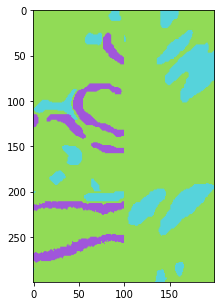

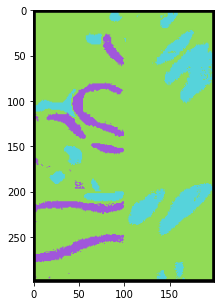

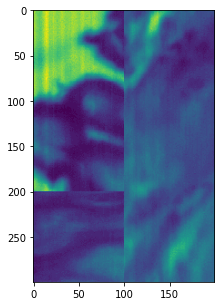

In [21]:
plt.figure(figsize=(5,5))
plt.imshow(convert_to_color_(gt,palette=palette))

plt.figure(figsize=(5,5))
plt.imshow(predict_color)

img = loadmat(f'{DATASET_PATH}/{IMG_NAME}')['image']
plt.figure(figsize=(5,5))
plt.imshow(img[:,:,100])

In [8]:
np.unique(predict)

array([0, 2, 3, 4], dtype=int64)

### Смотрим метрики

In [22]:
print(score(gt.flatten(), predict.flatten()))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         1
         2.0       0.98      0.94      0.96     48710
         3.0       0.98      0.88      0.93      7380
         4.0       0.94      0.91      0.92      3909

    accuracy                           0.93     60000
   macro avg       0.58      0.54      0.56     60000
weighted avg       0.98      0.93      0.95     60000



c:\users\firsov\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\firsov\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\firsov\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie